In [ ]:
# standard import
import pandas as pd
import numpy as np

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


# misc
import openml
from ucimlrepo import fetch_ucirepo
import os
from scipy.cluster.hierarchy import linkage, cut_tree

# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
X = pd.read_csv("../data/data_abalone/X.csv")
y = pd.read_csv("../data/data_abalone/y.csv", header=None).values.ravel()

In [3]:
# read in feature importances
base_dir = "../lfi-values/fulldata/rf/"
lotla_values = {}
shap_values = {}
lime_values = {}
first_breakpoint = {}
second_breakpoint = {}
for seed in range(5):
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    sorted_idx = X_test['Sex'].argsort()
    first_breakpoint[seed] = np.bincount(X_test['Sex'])[0]
    second_breakpoint[seed] = np.bincount(X_test['Sex'])[1] + first_breakpoint[seed]
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/elastic_nonnormed_nosquared_rank.csv", delimiter=",")[sorted_idx]
    shap_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/shap.csv", delimiter=",")[sorted_idx]
    lime_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/lime.csv", delimiter=",")[sorted_idx]

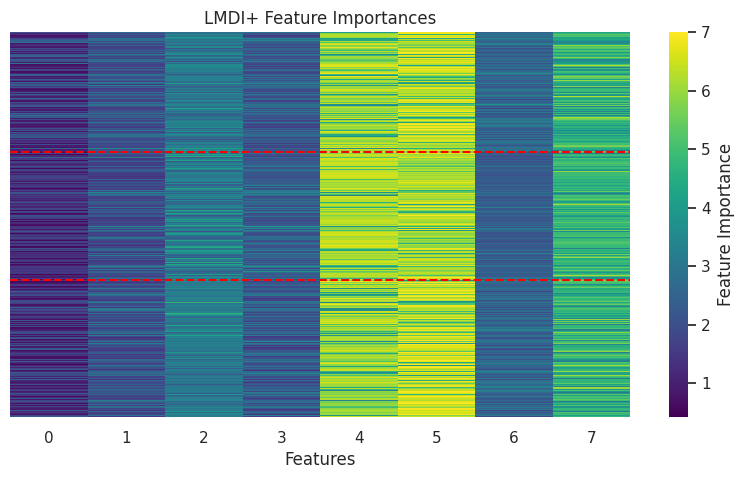

<Figure size 1000x500 with 0 Axes>

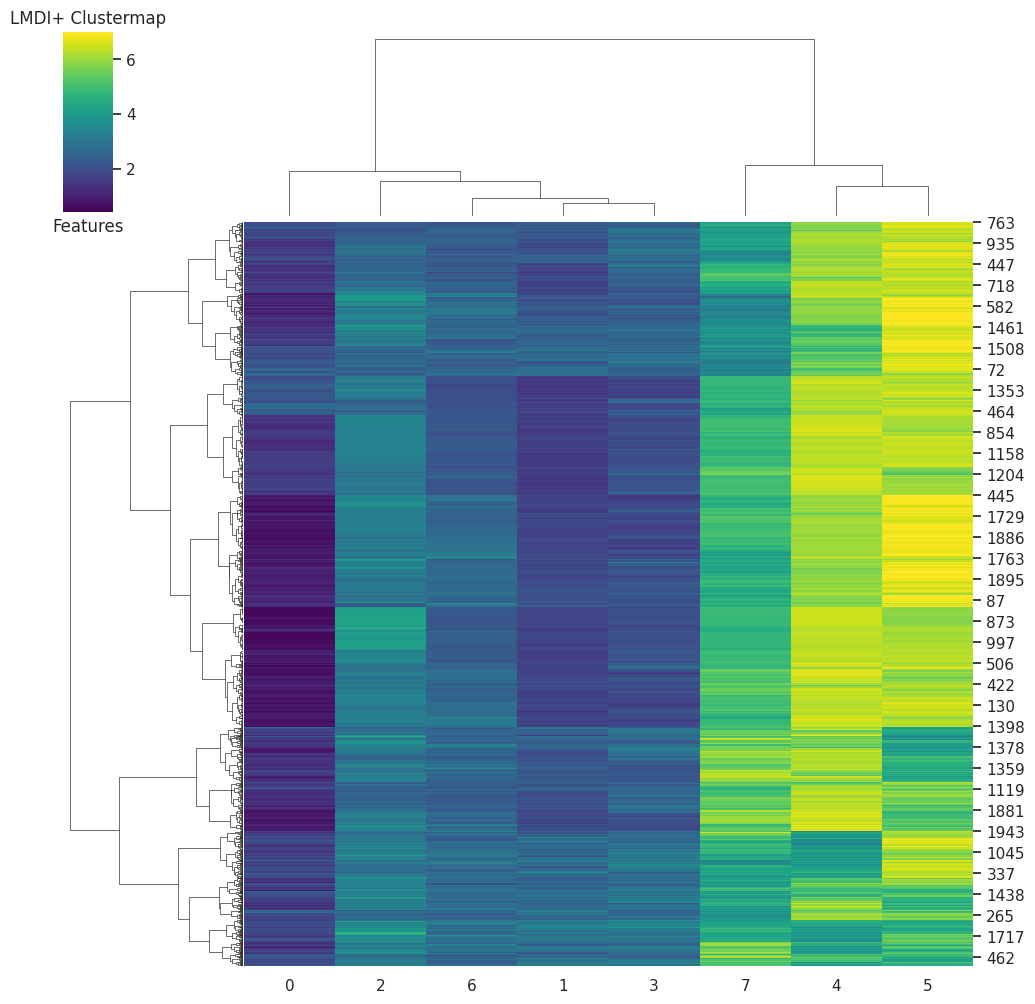

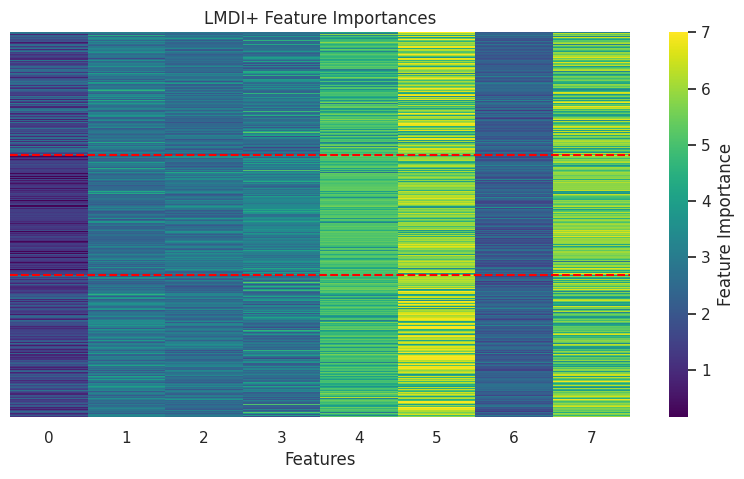

<Figure size 1000x500 with 0 Axes>

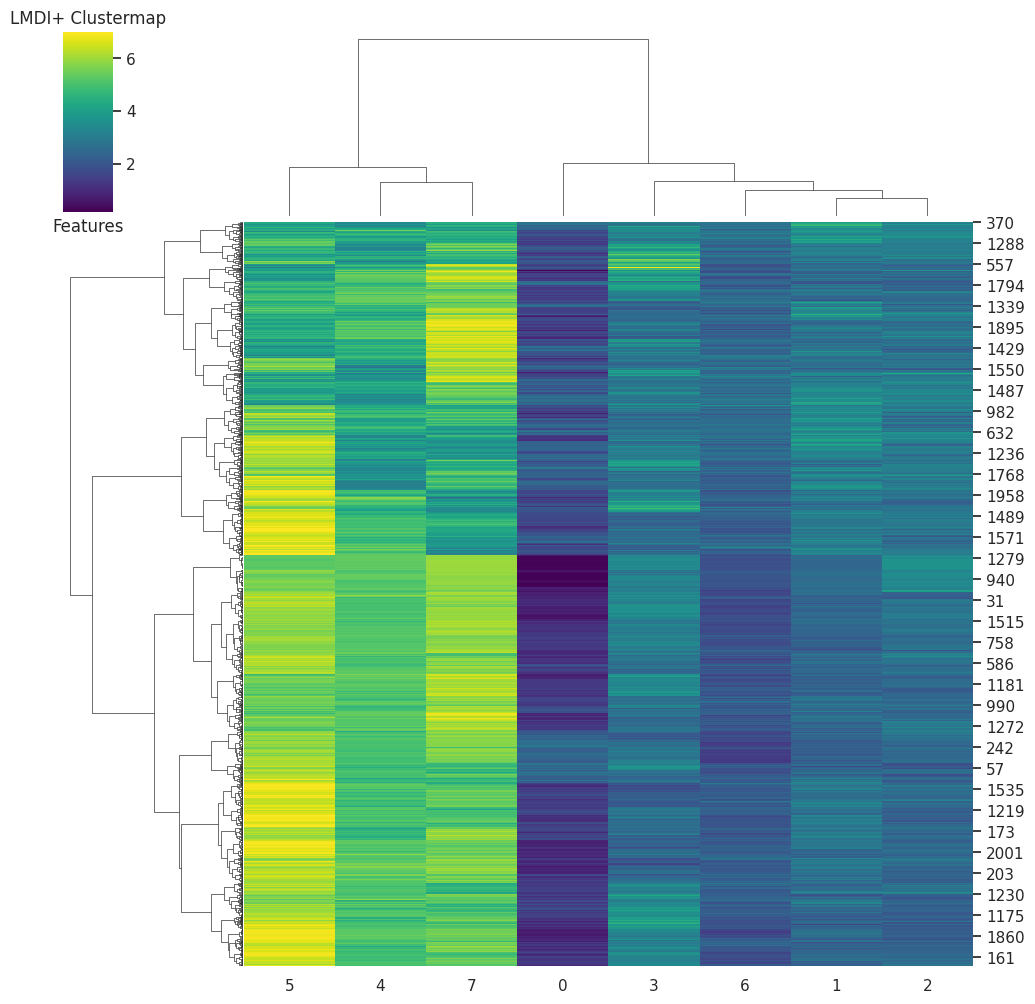

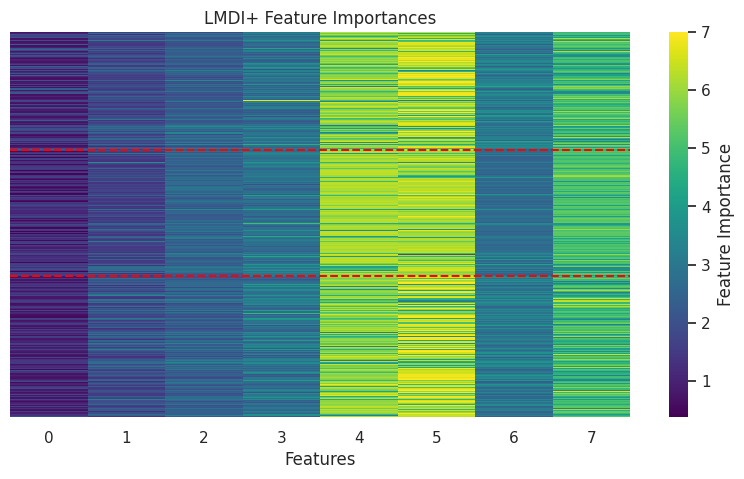

<Figure size 1000x500 with 0 Axes>

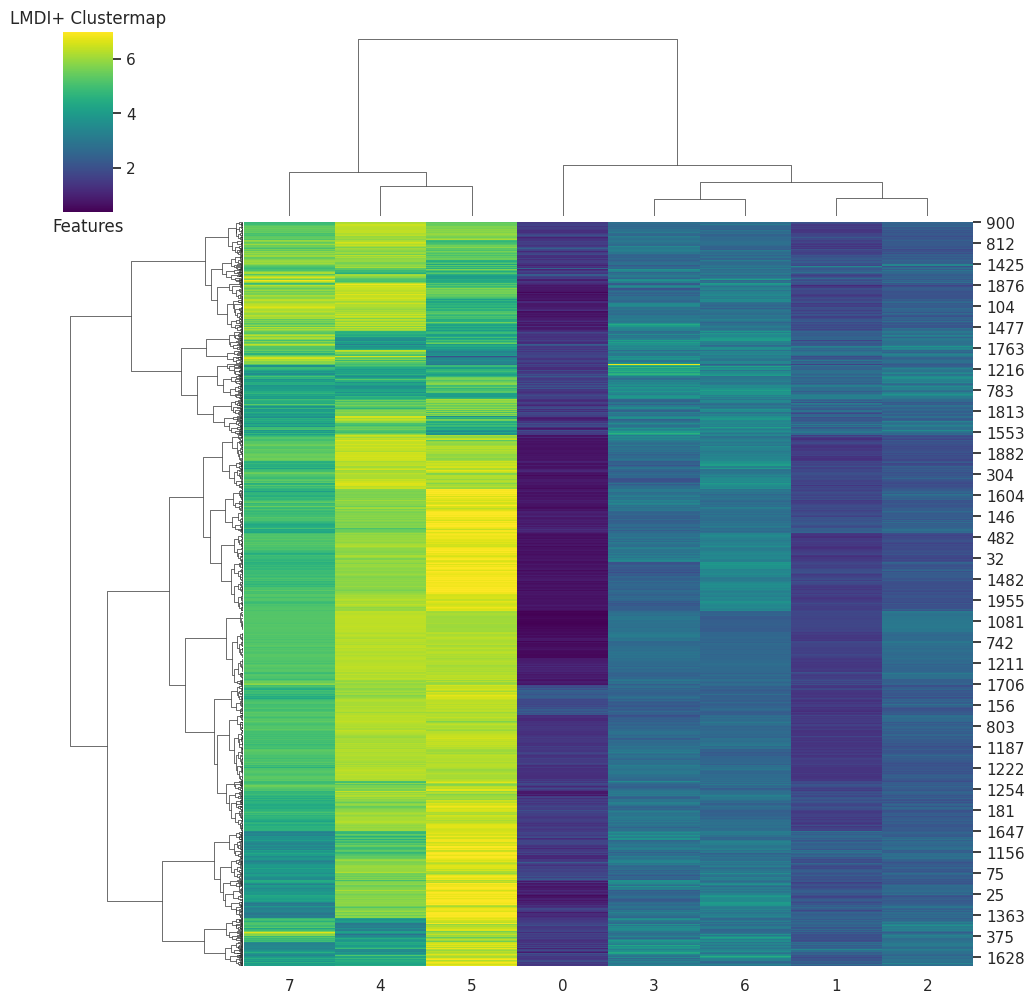

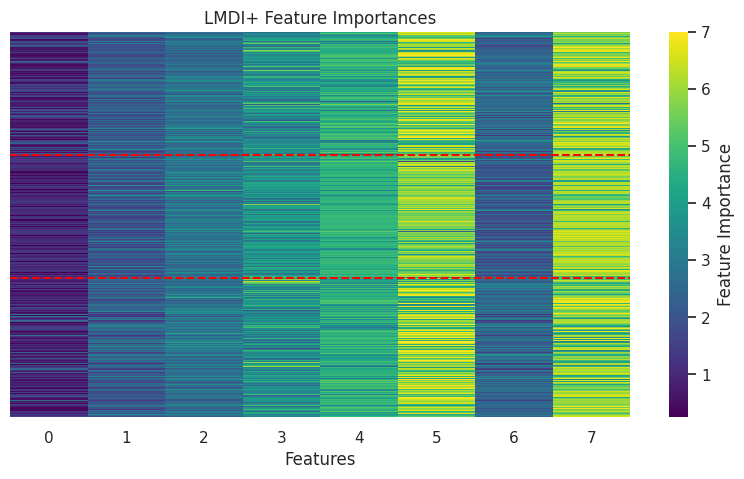

<Figure size 1000x500 with 0 Axes>

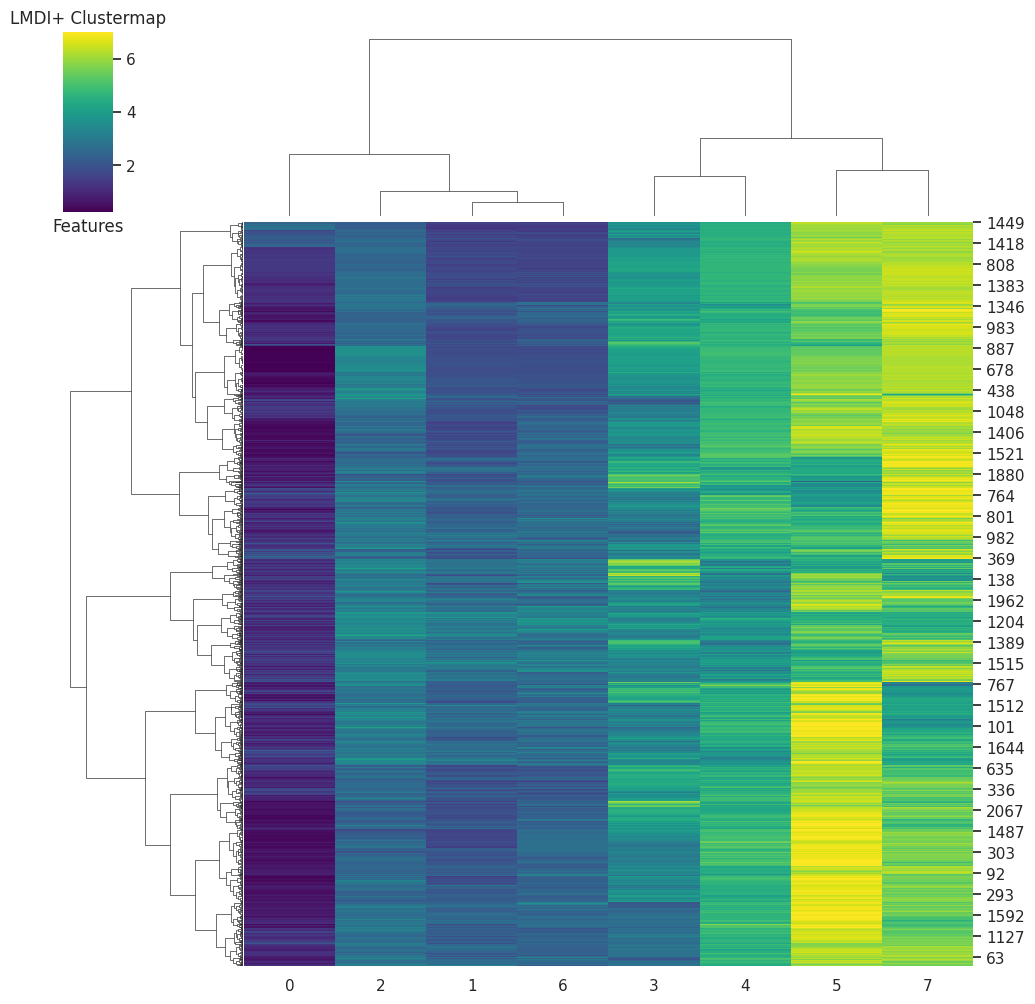

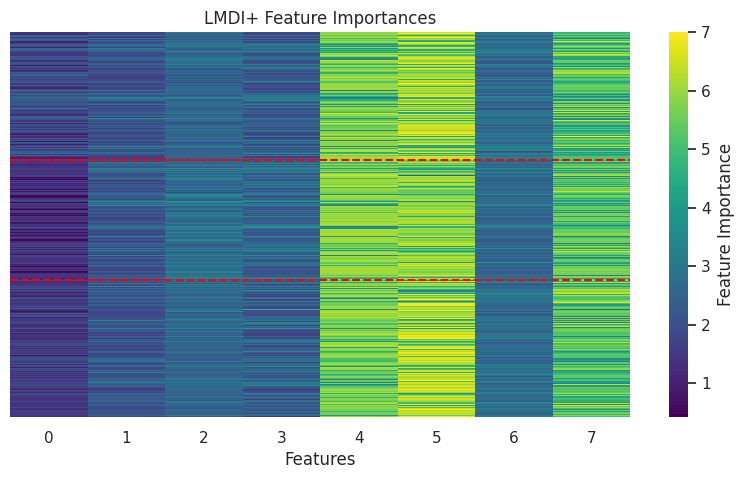

<Figure size 1000x500 with 0 Axes>

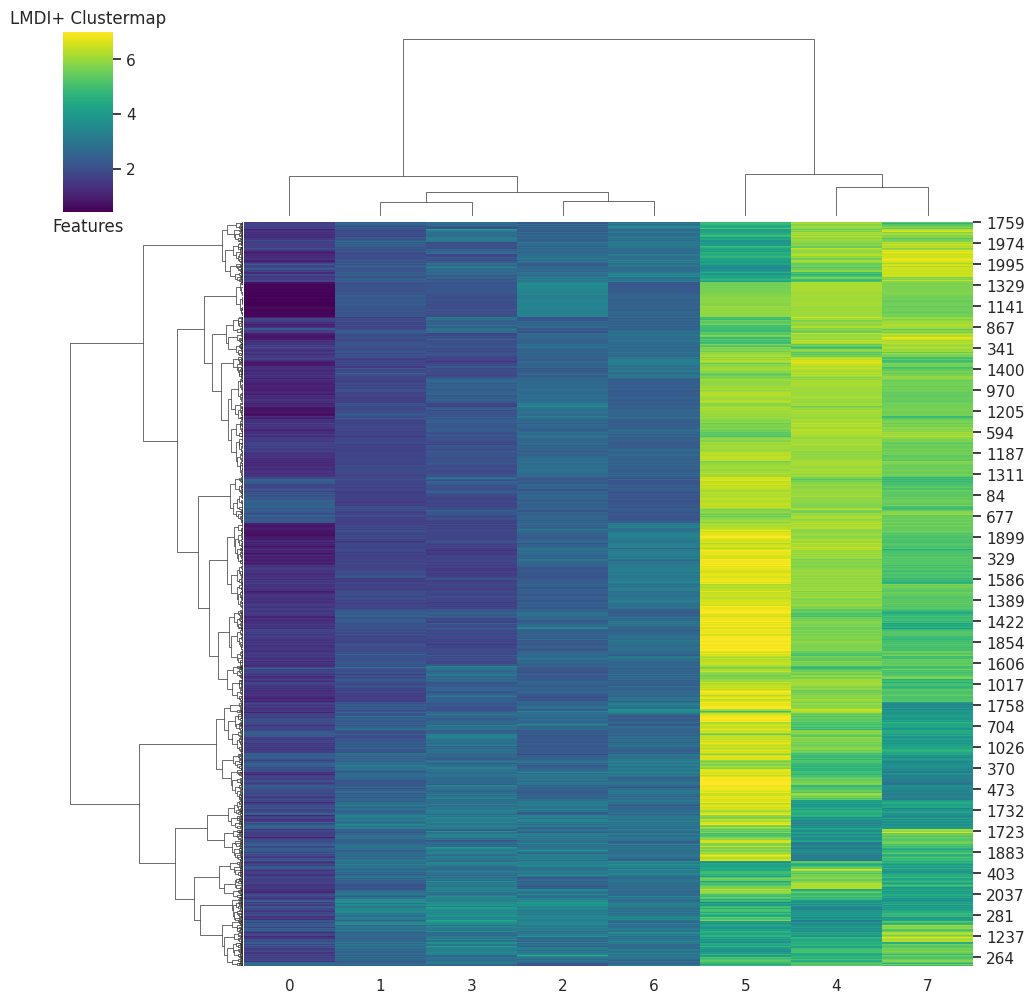

In [4]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LMDI+ Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=first_breakpoint[i], color='red', linestyle='--')
    plt.axhline(y=second_breakpoint[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.clustermap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'}, method='ward')
    plt.title("LMDI+ Clustermap")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.show()

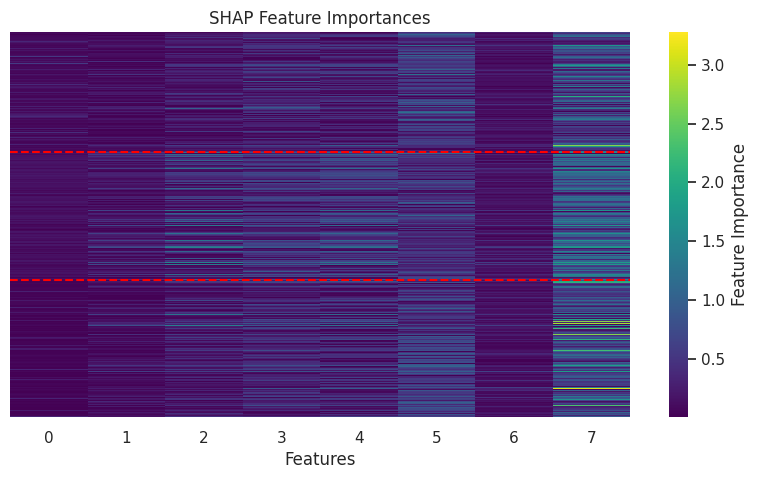

<Figure size 1000x500 with 0 Axes>

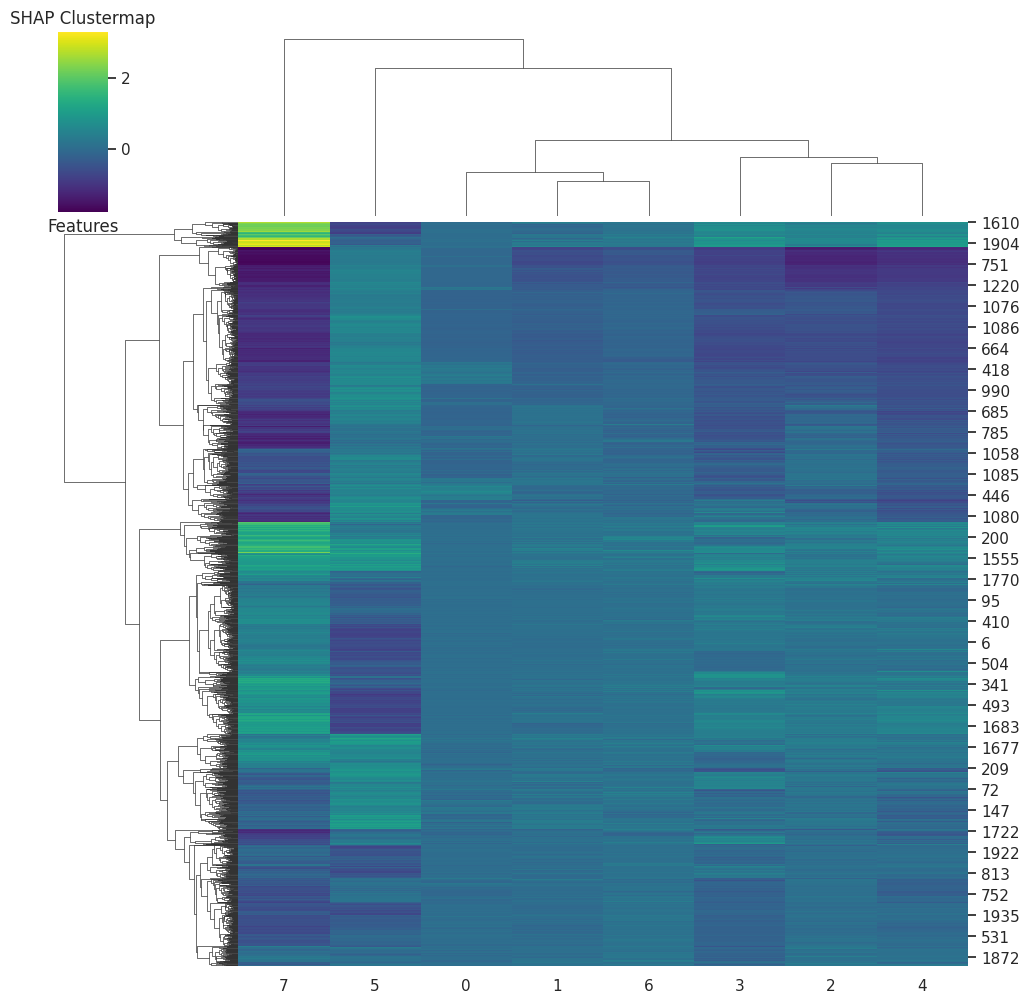

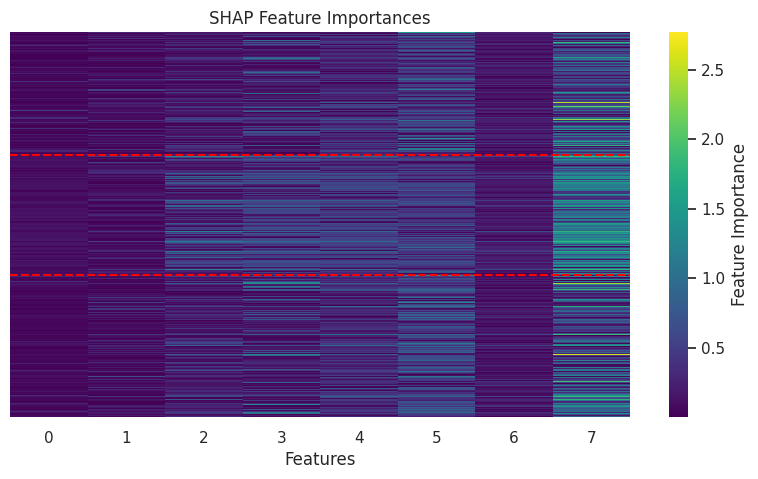

<Figure size 1000x500 with 0 Axes>

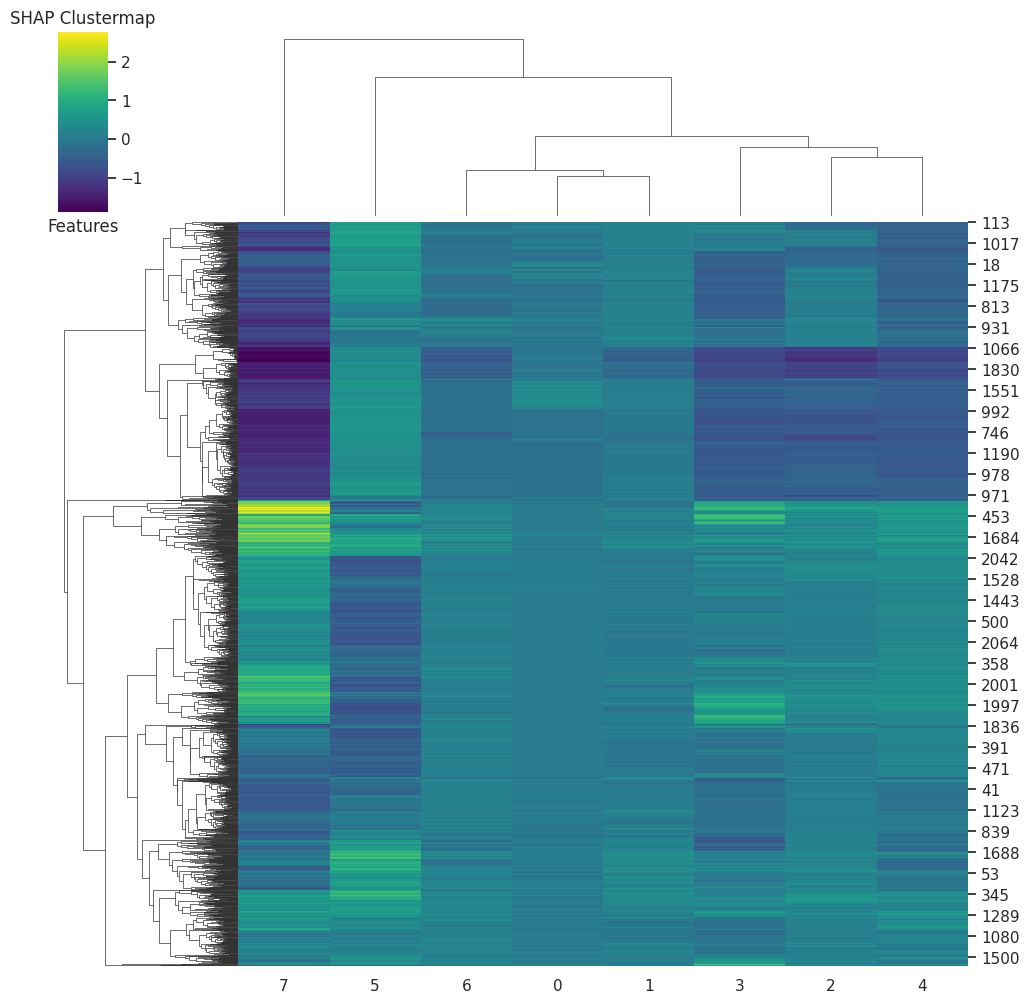

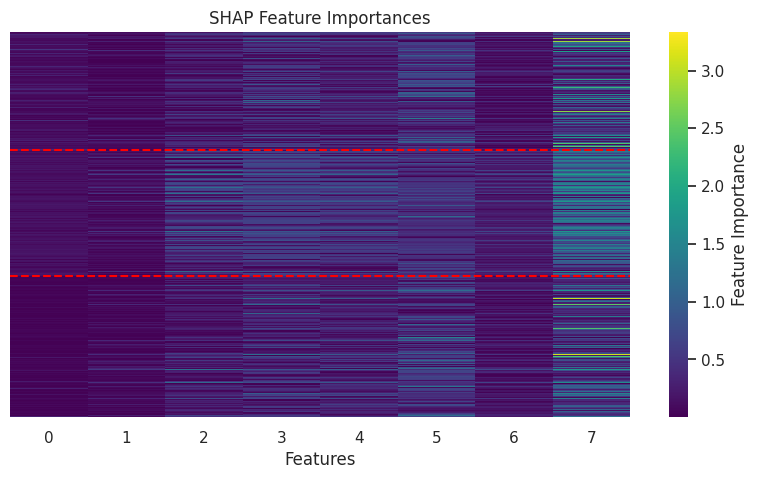

<Figure size 1000x500 with 0 Axes>

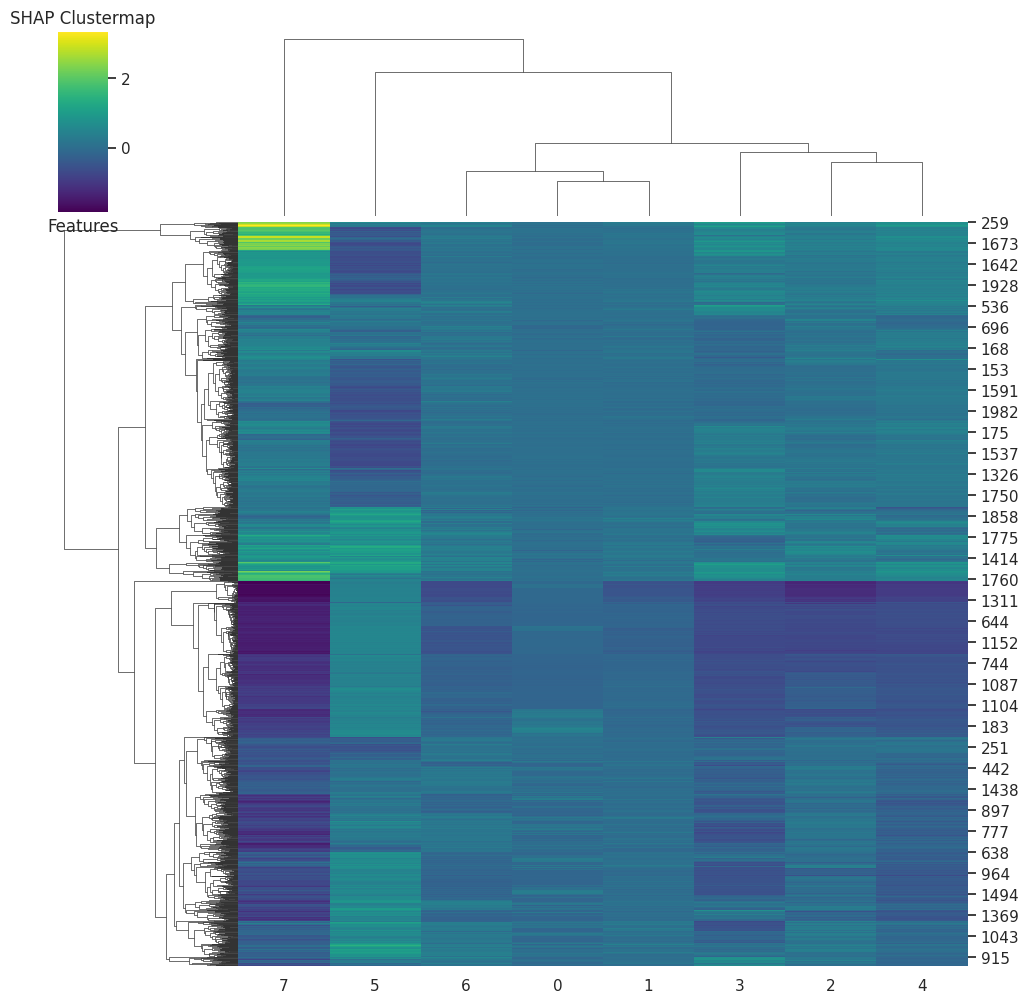

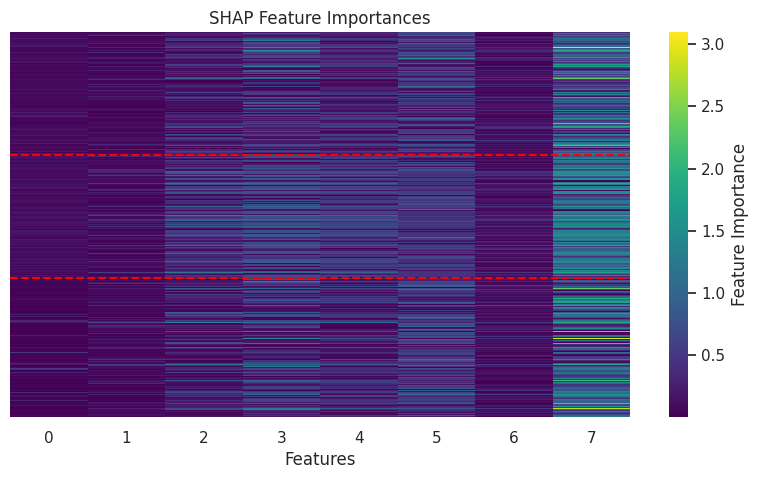

<Figure size 1000x500 with 0 Axes>

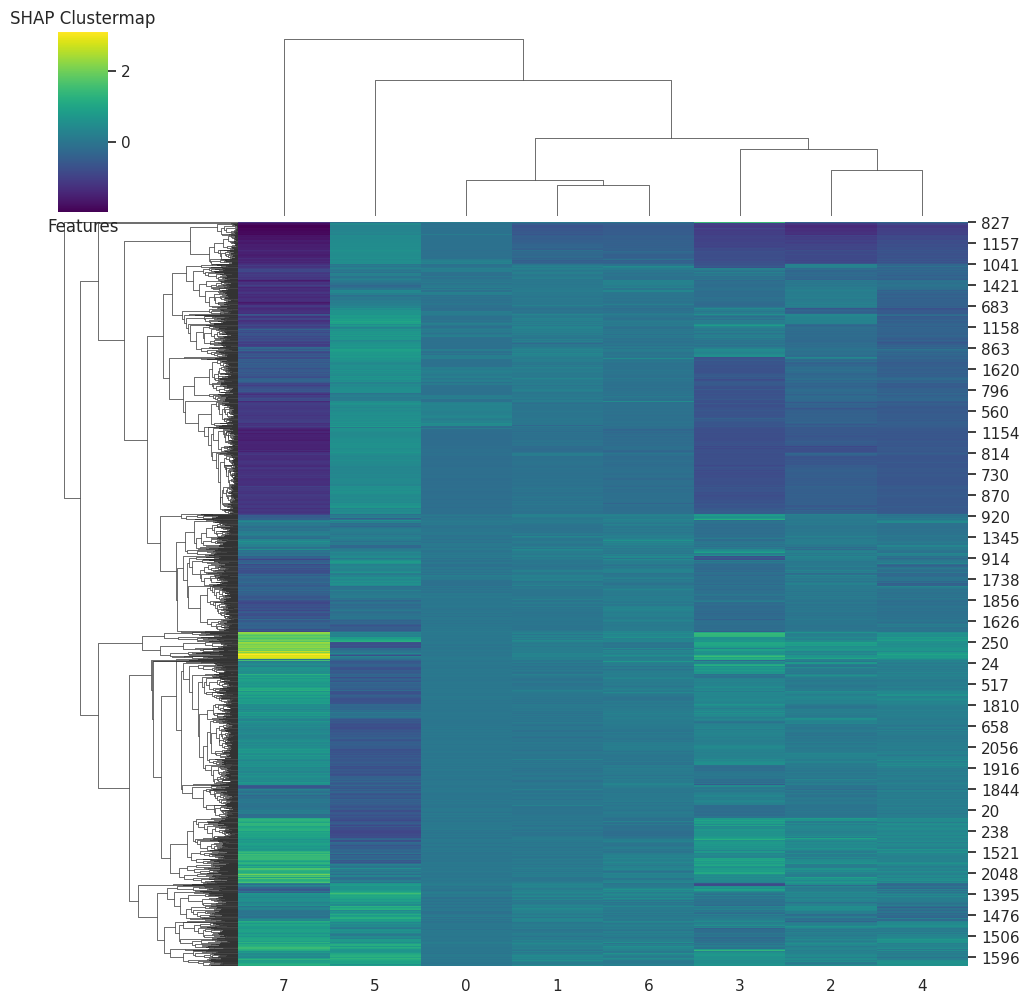

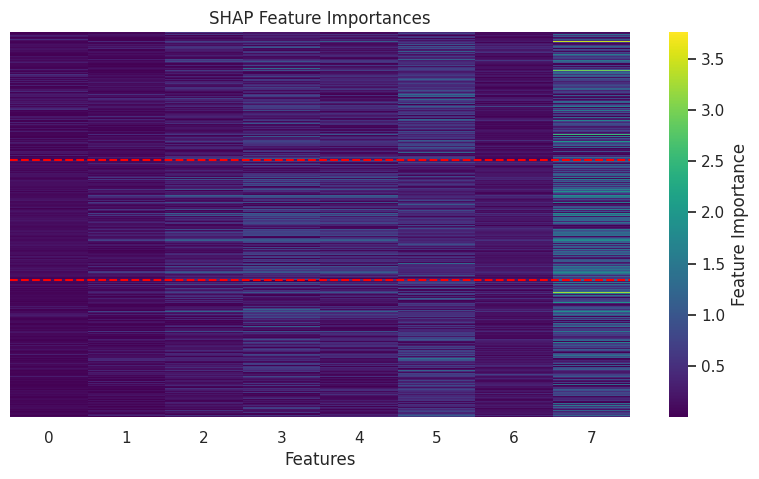

<Figure size 1000x500 with 0 Axes>

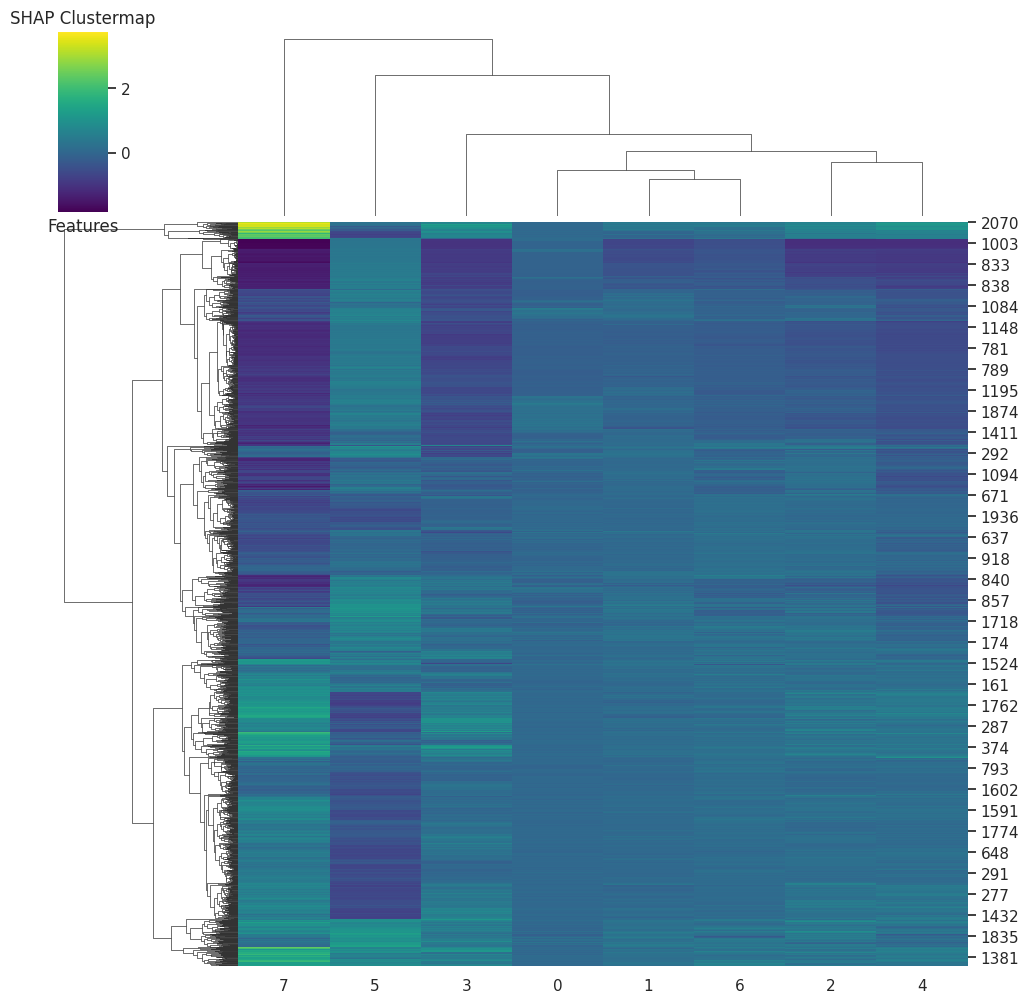

In [14]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(shap_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=first_breakpoint[i], color='red', linestyle='--')
    plt.axhline(y=second_breakpoint[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.clustermap(shap_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Clustermap")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.show()

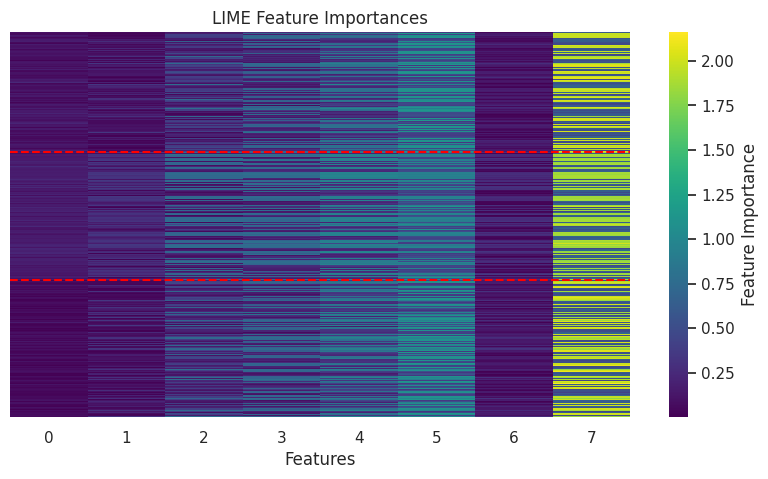

<Figure size 1000x500 with 0 Axes>

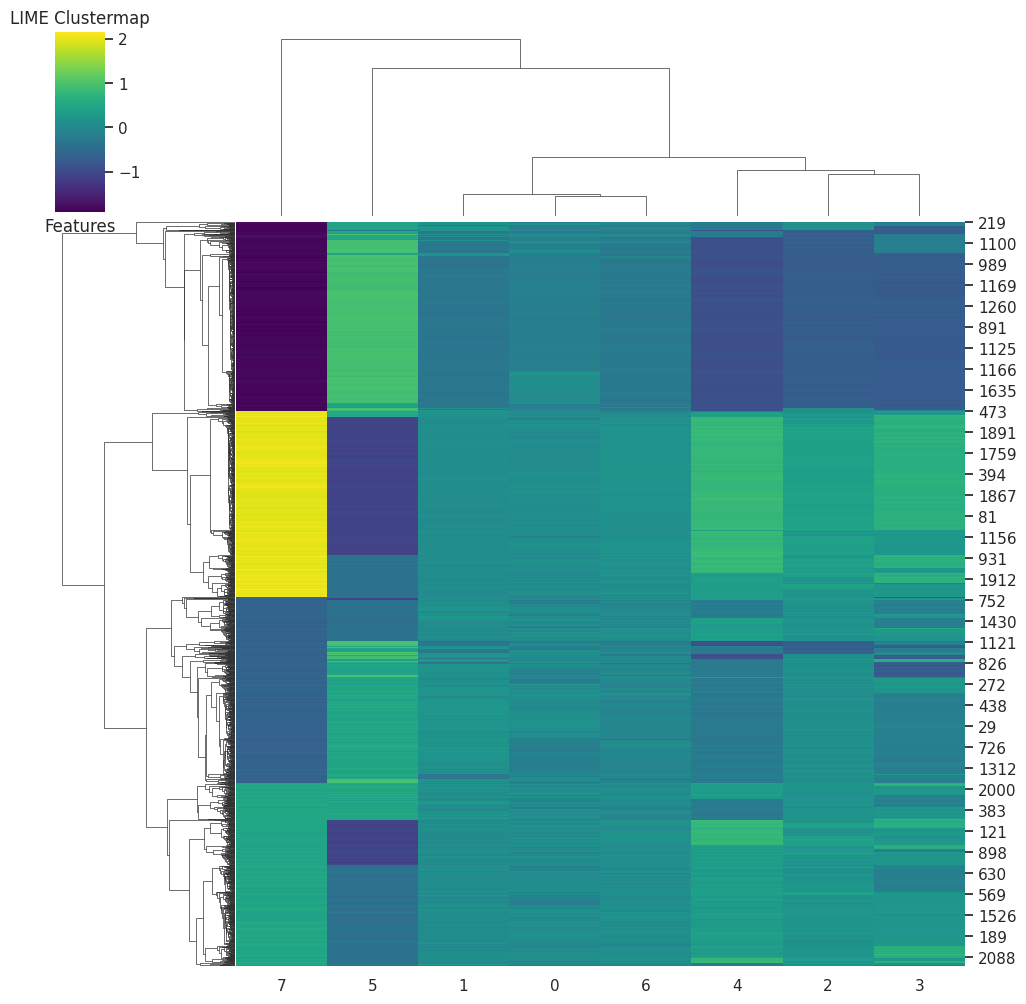

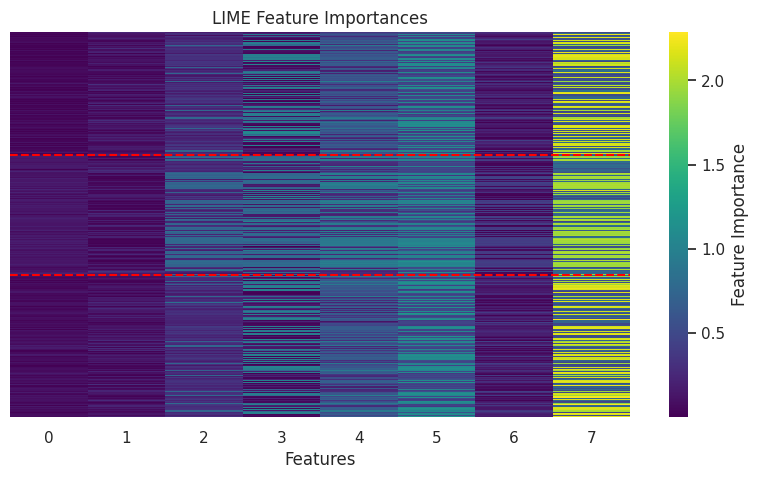

<Figure size 1000x500 with 0 Axes>

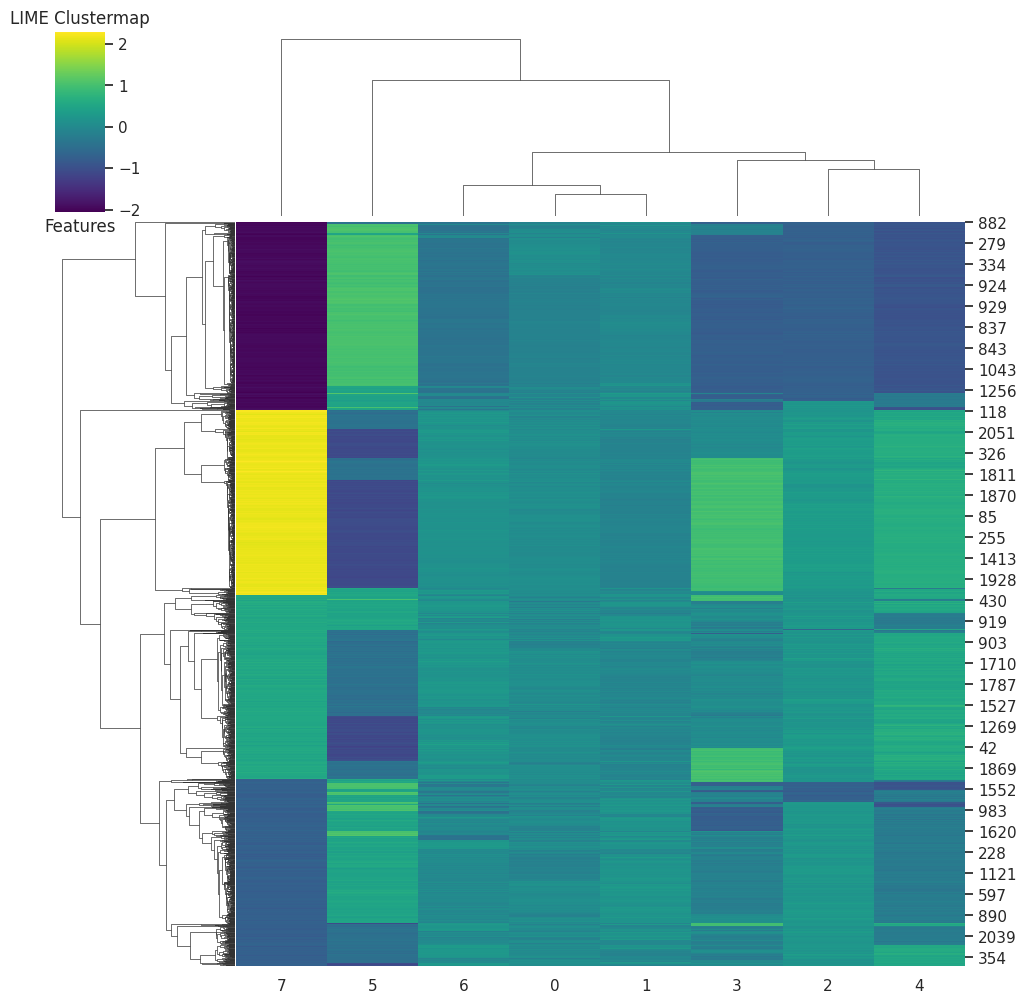

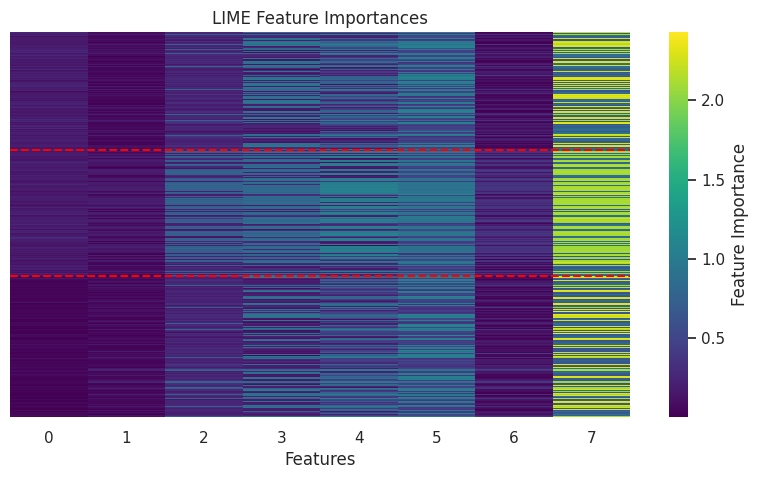

<Figure size 1000x500 with 0 Axes>

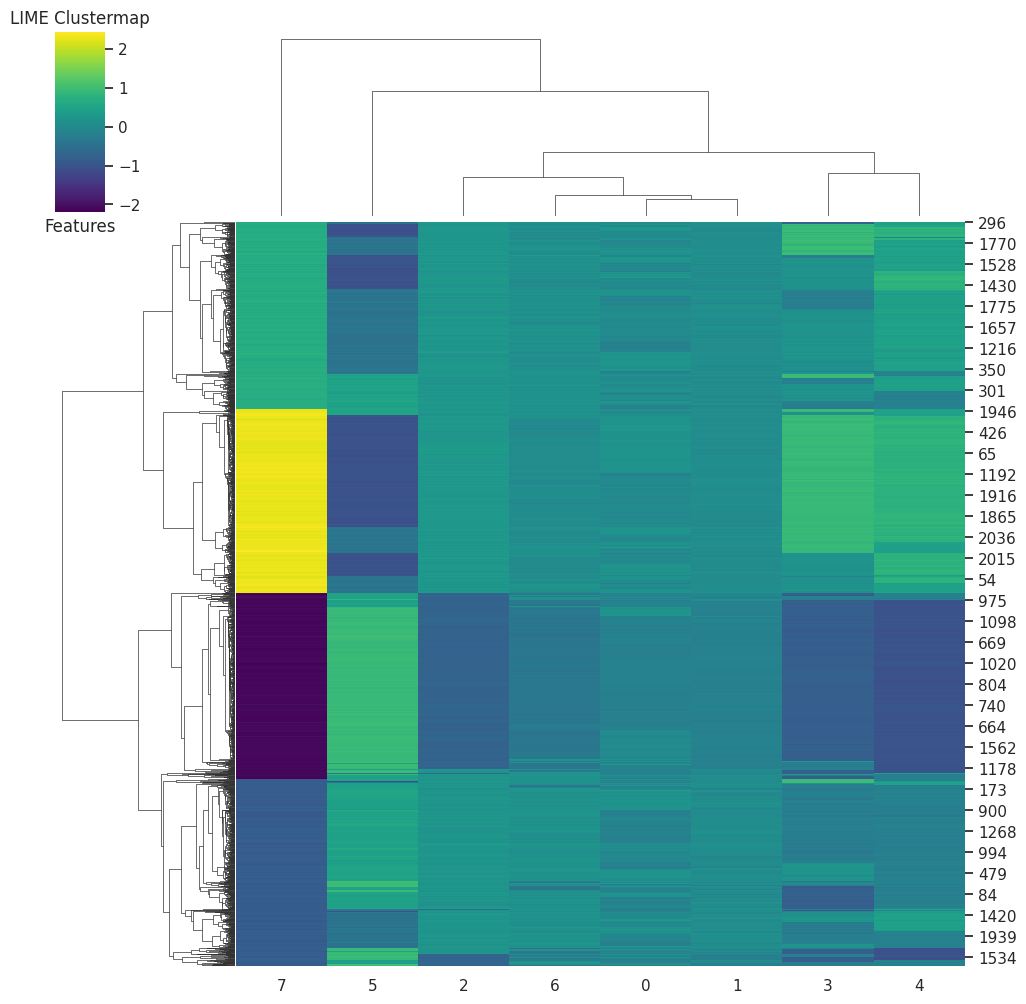

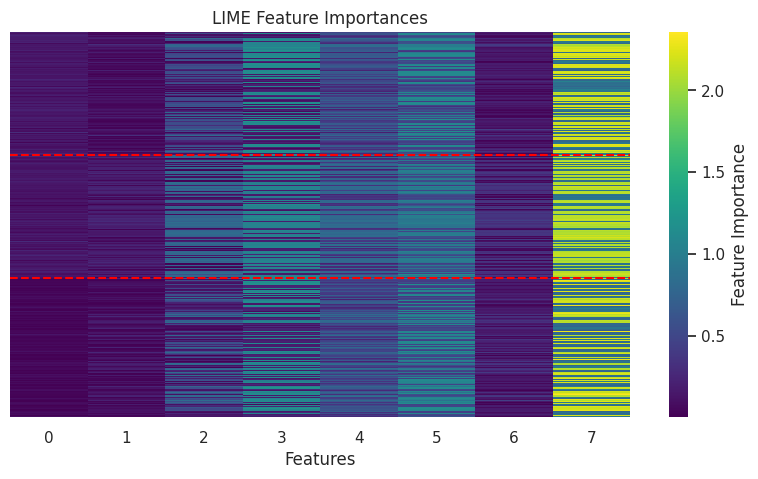

<Figure size 1000x500 with 0 Axes>

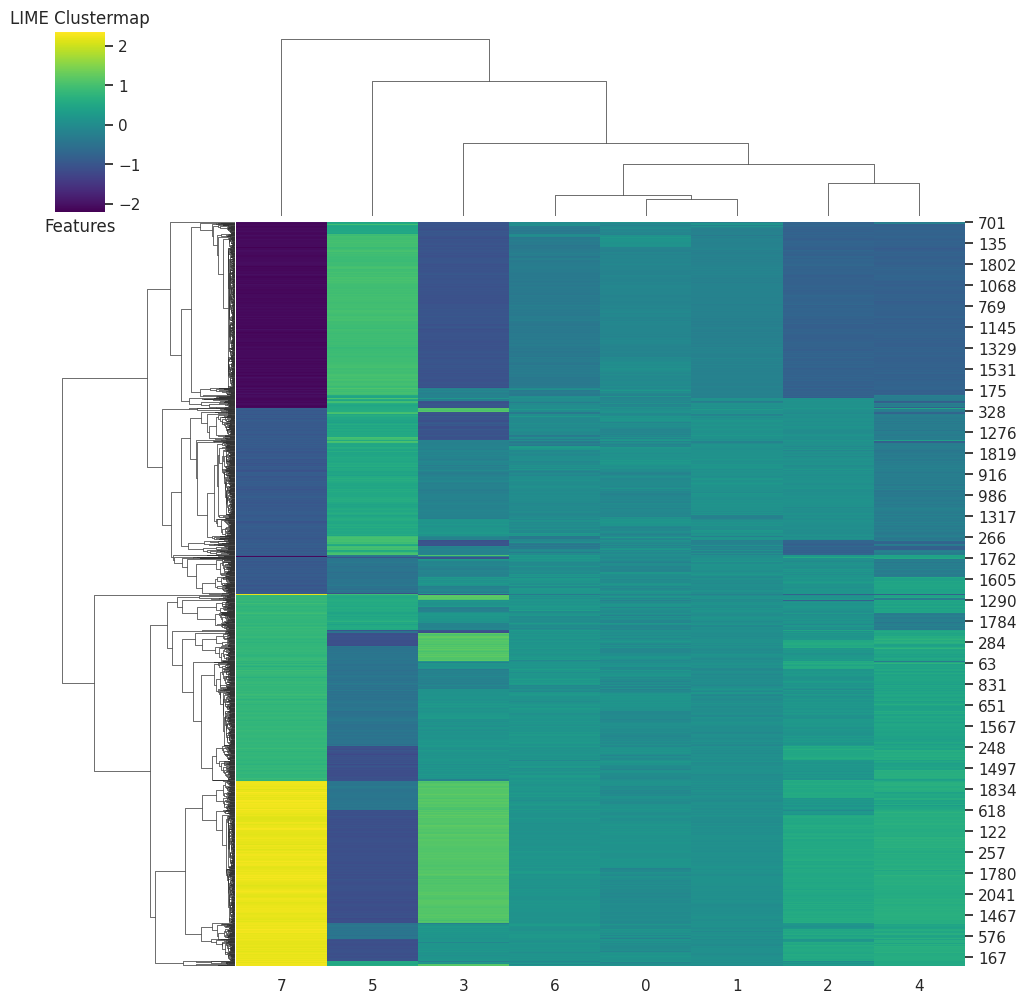

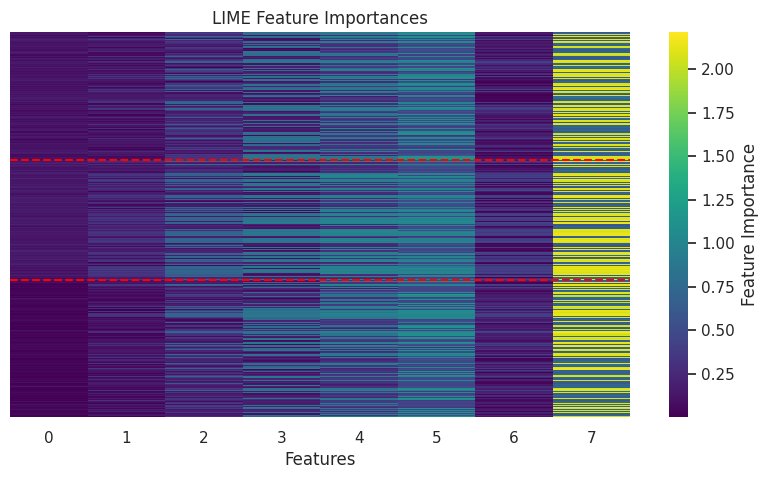

<Figure size 1000x500 with 0 Axes>

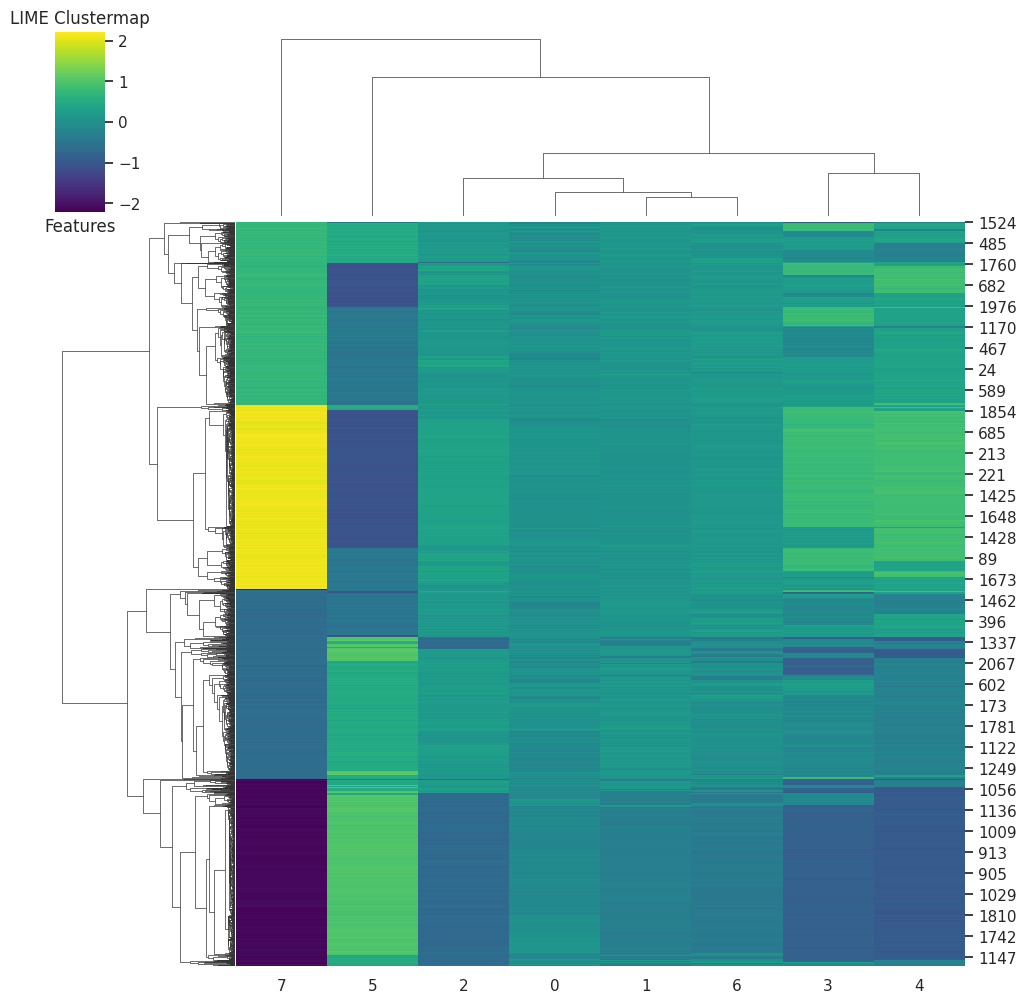

In [15]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(lime_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=first_breakpoint[i], color='red', linestyle='--')
    plt.axhline(y=second_breakpoint[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.clustermap(lime_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Clustermap")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.show()

In [ ]:
# for each seed, cluster the lotla importances
for i in range(5):
    print(f"Seed {i}:")
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/elastic_nonnormed_nosquared_rank.csv", delimiter=",")
    for nclust in range(2, 6):
        print("--------------------")
        # get k clusters through k-means clustering
        kmeans = KMeans(n_clusters=nclust, random_state=0).fit(lotla_values[i])
        cluster_labels = kmeans.labels_
        # print proportion of men & women in each cluster
        for k in range(nclust):
            print(f"Cluster {k+1}:", np.bincount(X_test[cluster_labels==k].loc[:, "Sex"])/X_test[cluster_labels==k].shape[0])

Seed 0:
--------------------
Cluster 1: [0.34175084 0.28282828 0.37542088]
Cluster 2: [0.3277592  0.32374582 0.34849498]
--------------------
Cluster 1: [0.31325301 0.32831325 0.35843373]
Cluster 2: [0.33046875 0.3296875  0.33984375]
Cluster 3: [0.34800839 0.25366876 0.39832285]
--------------------
Cluster 1: [0.32907348 0.32907348 0.34185304]
Cluster 2: [0.33072407 0.33365949 0.33561644]
Cluster 3: [0.36333333 0.24666667 0.39      ]
Cluster 4: [0.31497797 0.29515419 0.38986784]
--------------------
Cluster 1: [0.32846715 0.34306569 0.32846715]
Cluster 2: [0.32897384 0.33199195 0.33903421]
Cluster 3: [0.34946237 0.24731183 0.40322581]
Cluster 4: [0.35353535 0.25757576 0.38888889]
Cluster 5: [0.32265446 0.29977117 0.37757437]
Seed 1:
--------------------
Cluster 1: [0.32489451 0.30872011 0.36638537]
Cluster 2: [0.34632684 0.31934033 0.33433283]
--------------------
Cluster 1: [0.31932773 0.32492997 0.3557423 ]
Cluster 2: [0.33086876 0.29020333 0.37892791]
Cluster 3: [0.360587  0.308176

In [ ]:
# for each seed, cluster the lotla importances
for i in range(5):
    print(f"Seed {i}:")
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/abalone/elastic_nonnormed_nosquared_rank.csv", delimiter=",")
    # get the linkage for hierarchical clustering with ward
    Z = linkage(lotla_values[i], method='ward')
    for nclust in range(2, 6):
        print("--------------------")
        # get k clusters through hierarchical clustering
        cluster_labels = cut_tree(Z, nclust)
        # print proportion
        for k in range(nclust):
            print(f"Cluster {k+1}:", np.bincount(X_test[cluster_labels==k].loc[:, "Sex"])/X_test[cluster_labels==k].shape[0])

Seed 0:
--------------------
Cluster 1: [0.34179104 0.30149254 0.35671642]
Cluster 2: [0.32699084 0.31712474 0.35588443]
--------------------
Cluster 1: [0.32302405 0.35051546 0.32646048]
Cluster 2: [0.35620053 0.26385224 0.37994723]
Cluster 3: [0.32699084 0.31712474 0.35588443]
--------------------
Cluster 1: [0.32302405 0.35051546 0.32646048]
Cluster 2: [0.35620053 0.26385224 0.37994723]
Cluster 3: [0.33178654 0.2737819  0.39443155]
Cluster 4: [0.32489879 0.33603239 0.33906883]
--------------------
Cluster 1: [0.32302405 0.35051546 0.32646048]
Cluster 2: [0.35620053 0.26385224 0.37994723]
Cluster 3: [0.33178654 0.2737819  0.39443155]
Cluster 4: [0.30368098 0.3404908  0.35582822]
Cluster 5: [0.36607143 0.32738095 0.30654762]
Seed 1:
--------------------
Cluster 1: [0.32083863 0.31385006 0.36531131]
Cluster 2: [0.36504854 0.30679612 0.32815534]
--------------------
Cluster 1: [0.32640693 0.31341991 0.36017316]
Cluster 2: [0.30548926 0.3150358  0.37947494]
Cluster 3: [0.36504854 0.30679